### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
# import required python libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import textwrap

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
# Read the dataset from .csv file
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# Util functions

# Get column value counts
def getColumnValueCounts(col):
    # Check value count for each unique value for column 
    return data.groupby(col)[col].value_counts()

# Wrap labels for x-axis
def wrap_labels(ax, width, n, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width, break_long_words=break_long_words))
    ax.set_xticks(np.arange(0, n, 1))
    ax.set_xticklabels(labels, rotation=0)

2. Investigate the dataset for missing or problematic data.

<b>2.1 Check the shape of dataframe.</b>

In [5]:
# Check number of rows and columsn
data.shape

(12684, 26)

<b>2.2 Check the missing values for each column.</b>

In [6]:
# Check missing value counts for each column
missing_values_all = data.isna().sum()
missing_values_all

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<b>2.3 Find percentage of missing values for each column which have missing values.</b>

In [7]:
# Check percentage of missing values for the columns which have more non-zero missing values
def find_missing_values_percentage():
    missing_values = missing_values_all[missing_values_all > 0]
    missing_values_percentage = (missing_values / data.shape[0]) * 100
    return missing_values_percentage

find_missing_values_percentage()

car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64

<h><b>Summary: Null Value Columns</b></h>
    <ol>
      <li><b>Column<i>"car"</i>:</b> More than 99% of values are missing.</li>
      <li><b>Column<i>"Bar"</i>:</b> Less than 1% of values are missing.</li>
      <li><b>Columns<i>"CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50"</i>:</b> Missing values in the range of 1% to 2%.</li>
    </ol>

3. Decide what to do about your missing data -- drop, replace, other...

<b>3.1 <i>Car</i> column have more than 99% of values missing. The type of vehicle should not affect coupon acceptance. We could drop the car column or fill it with a value 'car'. I would drop the column as this column is agnostic of coupon acceptance with 99% missing values.</b>

In [8]:
# Check unique values for car column
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [9]:
# Drop car column as more than 99% values are null
data.drop('car', axis=1, inplace=True)
data.shape

(12684, 25)

<b>3.2 <i>Bar</i> column is categorical column and have ~0.84% of values missing. We could replace missing values with mode.</b>

In [10]:
# Check unique values for column "Bar"
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [11]:
# Check value count for each unique value for column "Bar"
getColumnValueCounts('Bar')

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5197
Name: count, dtype: int64

In [12]:
# Replace null value for column "Bar" with mode of the column
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['Bar'].isna().sum()

np.int64(0)

In [13]:
# Unique value counts for Bar column after handling missing values
getColumnValueCounts('Bar')

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5304
Name: count, dtype: int64

<b>3.3 <i>CoffeHouse</i> column is categorical column and have ~1.71% of values missing. We would replace missing values with random column values as mode of multiple values are high.</b>

In [14]:
# check unique values for column "CoffeeHouse"
pd.Series(data['CoffeeHouse'].unique())

0    never
1    less1
2      4~8
3      1~3
4      gt8
5      NaN
dtype: object

In [15]:
# Check value count for each unique value for column "CoffeeHouse"
getColumnValueCounts('CoffeeHouse')

CoffeeHouse
1~3      3225
4~8      1784
gt8      1111
less1    3385
never    2962
Name: count, dtype: int64

In [16]:
# Fill missing values with mode of the column
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CoffeeHouse'].isna().sum()

np.int64(0)

In [17]:
# Unique value counts for CoffeeHouse column after handling missing values
getColumnValueCounts('CoffeeHouse')

CoffeeHouse
1~3      3225
4~8      1784
gt8      1111
less1    3602
never    2962
Name: count, dtype: int64

<b>3.4 <i>CarryAway</i> column is categorical column and have ~1.19% of values missing. We would replace missing values with random column values as mode of multiple values are high.</b>

In [18]:
# Check unique values of CarryAway column
data['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [19]:
# Check frquency of each unique values
getColumnValueCounts('CarryAway')

CarryAway
1~3      4672
4~8      4258
gt8      1594
less1    1856
never     153
Name: count, dtype: int64

In [20]:
# Fill missing values with mode of the column
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['CarryAway'].isna().sum()

np.int64(0)

In [21]:
# Unique value counts for CoffeeHouse column after handling missing values
getColumnValueCounts('CarryAway')

CarryAway
1~3      4823
4~8      4258
gt8      1594
less1    1856
never     153
Name: count, dtype: int64

<b>3.5 <i>RestaurantLessThan20</i> column is categorical column and have ~1.02% of values missing. We would replace missing values with random column values as mode of multiple values are high.</b>

In [22]:
# Check unique values
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [23]:
# Check frquency of each unique values for colum RestaurantLessThan20
getColumnValueCounts('RestaurantLessThan20')

RestaurantLessThan20
1~3      5376
4~8      3580
gt8      1285
less1    2093
never     220
Name: count, dtype: int64

In [24]:
# Fill missing values with mode of the column
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['RestaurantLessThan20'].isna().sum()

np.int64(0)

In [25]:
# Unique value counts for CoffeeHouse column after handling missing values
getColumnValueCounts('RestaurantLessThan20')

RestaurantLessThan20
1~3      5506
4~8      3580
gt8      1285
less1    2093
never     220
Name: count, dtype: int64

<b>3.1.6 <i>Restaurant20To50</i> column is categorical column and have ~1.49% of values missing. We would replace missing values with random column values as mode of multiple values are high.</b>

In [26]:
# Check unique values
data['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

<b>Check frquency of each unique values</b>

In [27]:
# Check frequency of each unique values
getColumnValueCounts('Restaurant20To50')

Restaurant20To50
1~3      3290
4~8       728
gt8       264
less1    6077
never    2136
Name: count, dtype: int64

In [28]:
# Fill missing values with mode of the column
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data['Restaurant20To50'].isna().sum()

np.int64(0)

In [29]:
# Unique value counts for CoffeeHouse column after handling missing values
getColumnValueCounts('Restaurant20To50')

Restaurant20To50
1~3      3290
4~8       728
gt8       264
less1    6266
never    2136
Name: count, dtype: int64

3.1.7 Fix typo for <b>passanger</b> column

In [30]:
# Fix column name typo
data = data.rename(columns={'passanger': 'passenger'})

4. What proportion of the total observations chose to accept the coupon?



In [31]:
# Find all coupons acceptance performance
def find_coupon_acceptance():
    total_observations = data.shape[0]
    coupon_accept_count = data[data['Y'] == 1]['Y'].sum()
    coupon_acceptance_proportion = np.round((coupon_accept_count / total_observations) * 100, 2)
    print(f"Coupon Acceptance Proportion: {coupon_accept_count} / {total_observations} / {coupon_acceptance_proportion} %")

find_coupon_acceptance()

Coupon Acceptance Proportion: 7210 / 12684 / 56.84 %


<h><b>Summary: Coupon Acceptance Proportion: 56.84 %<b></h>

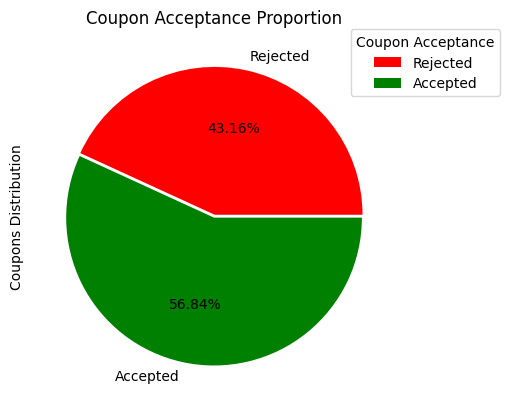

In [32]:
# Plot overall coupon acceptance and decline

def plot_coupon_acceptance():
    coupons_acceptance_df = data.groupby('Y')['Y'].value_counts()
    coupons_acceptance_df.plot(kind='pie', labels=['Rejected', 'Accepted'], explode = [0.01,0.01], autopct = '%1.2f%%', colors = ['r', 'g'])
    plt.legend(title="Coupon Acceptance", bbox_to_anchor=(0.85,1.025))
    plt.ylabel('Coupons Distribution')
    plt.title('Coupon Acceptance Proportion')
    plt.savefig("images/coupons_acceptance_proportion.png")

plot_coupon_acceptance()

5. Use a bar plot to visualize the `coupon` column.

In [33]:
# Check unique values for coupon column
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [34]:
# Find count for each type of coupon
coupon = getColumnValueCounts('coupon').reset_index()
coupon

,coupon,count
0,Bar,2017
1,Carry out & Take away,2393
2,Coffee House,3996
3,Restaurant(20-50),1492
4,Restaurant(<20),2786


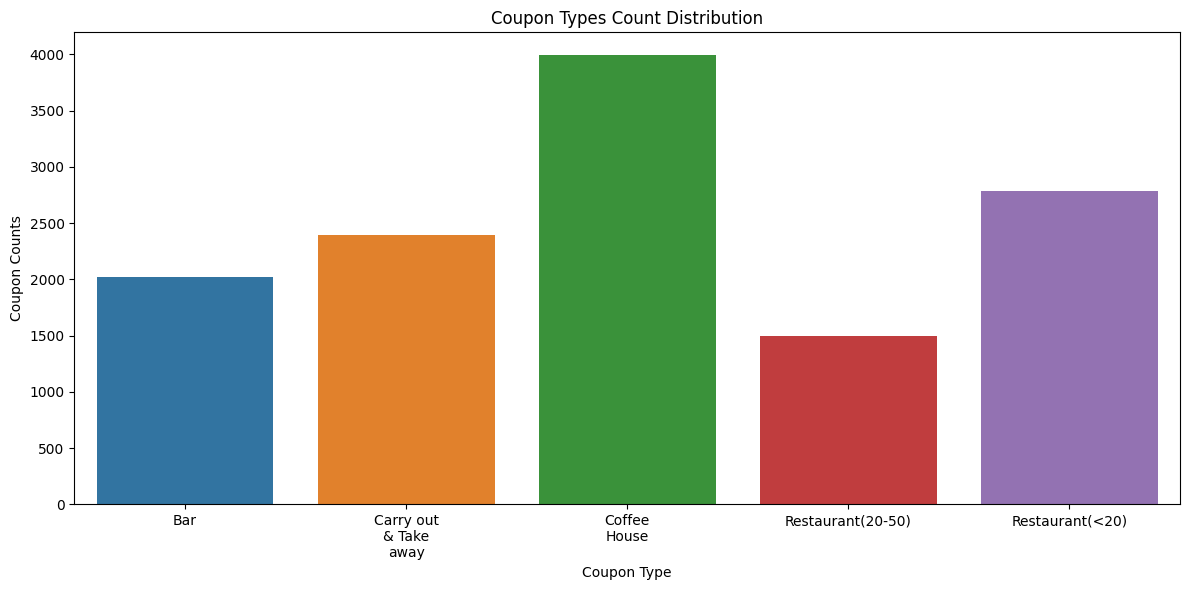

In [35]:
# Bar plot visualization for coupon types
def plot_coupon_types_distribution(plt):
    ax = sns.barplot(coupon, x='coupon', y='count', hue='coupon')
    wrap_labels(ax, 10, len(coupon))
    plt.title('Coupon Types Count Distribution')
    plt.xlabel('Coupon Type')
    plt.ylabel('Coupon Counts')
    plt.savefig("images/coupons_types_distribution.png")

plt.figure(figsize = (12, 6))
plt.subplot(111)
plot_coupon_types_distribution(plt)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

In [36]:
temp_df = data[['temperature']]
temp_df.head()

,temperature
0,55
1,80
2,80
3,80
4,80


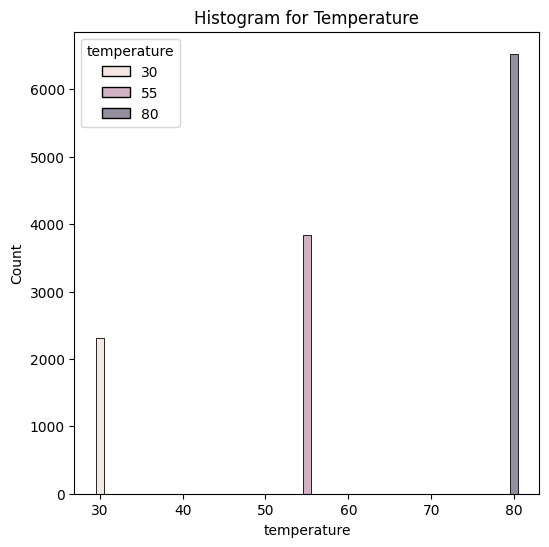

In [37]:
# Visulation for temperature column
def plot_temperature_col_distribution(col, title, file_name):
    plt.figure(figsize=(6, 6))
    sns.histplot(temp_df, x=col, hue=col, discrete=True, edgecolor='black')
    plt.title(title)
    plt.savefig(file_name)
    plt.show()

plot_temperature_col_distribution('temperature', 'Histogram for Temperature', 'images/temperature_histogram.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [38]:
# Check unique values for coupon column
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [39]:
# Get dataframe for coupon type 'Bar'
bar_coupon_df = data[data['coupon'] == 'Bar']
bar_coupon_df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [40]:
accepted_bar_coupons_df = bar_coupon_df.query('Y == 1')
accepted_bar_coupons_df.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [41]:
# find total number of bar coupons
total_bar_coupons = bar_coupon_df.shape[0]

# find total number of accepted bar coupons
accepted_bar_coupons = accepted_bar_coupons_df['Y'].count()

In [42]:
# Accepted bar coupons proportion compared to total bar coupons
accpted_bar_coupons_proportion = np.round((accepted_bar_coupons / total_bar_coupons) * 100, 2)
print(f'Accepted bar coupons proportion: {accpted_bar_coupons_proportion} %')

Accepted bar coupons proportion: 41.0 %


<h><b>Summary: Bar coupons acceptance rate is 41.0%<b></h>
    <ol>
      <li><b>Acceptance count for bar coupons (B1): 827</b></li>
      <li><b>Total bar coupons count (B2): 2017</b></li>
    </ol>

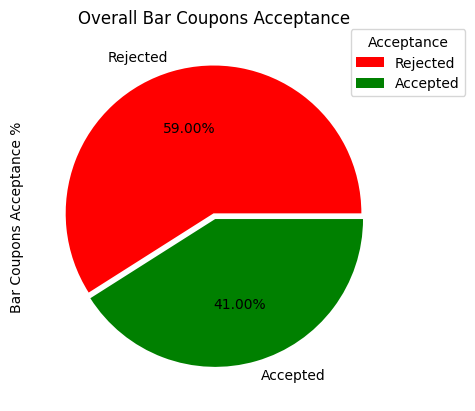

In [43]:
# plot Bar coupons acceptance proportion

def plot_bar_coupons_acceptance_proportion():
    plt.title("Bar Coupons (Accepted vs Rejected)")
    bar_coupon_df['Y'].value_counts().plot(kind='pie', labels=['Rejected', 'Accepted'], explode = [0.02,0.02], autopct = '%1.2f%%', colors = ['r', 'g'])
    plt.legend(title="Acceptance", bbox_to_anchor=(0.85,1.025), loc="upper left")
    plt.ylabel('Bar Coupons Acceptance %')
    plt.title('Overall Bar Coupons Acceptance')

plot_bar_coupons_acceptance_proportion()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [44]:
# Check unique values for Bar column
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [45]:
data.iloc[0]

destination                      No Urgent Place
passenger                                  Alone
weather                                    Sunny
temperature                                   55
time                                         2PM
coupon                           Restaurant(<20)
expiration                                    1d
gender                                    Female
age                                           21
maritalStatus                  Unmarried partner
has_children                                   1
education               Some college - no degree
occupation                            Unemployed
income                           $37500 - $49999
Bar                                        never
CoffeeHouse                                never
CarryAway                                    1~3
RestaurantLessThan20                         4~8
Restaurant20To50                             1~3
toCoupon_GEQ5min                               1
toCoupon_GEQ15min   

In [46]:
# Find value counts for bar visits frquency
getColumnValueCounts('Bar')

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5304
Name: count, dtype: int64

In [47]:
# set bar visits list based on frquency of visit
bar_visits_3_or_less = ['1~3', 'less1', 'never']
bar_visits_4_or_more = ['4~8','gt8']

# Bar visits frequnecy comparision for <=3 and >=4 visits for accepted bar coupons
def bar_visits_frquency_comparision():    
    bar_visits_3_or_less_acceptance = accepted_bar_coupons_df.query('Bar in @bar_visits_3_or_less and coupon == "Bar"')['Bar'].value_counts().sum()
    bar_visits_3_or_less_acceptance
    
    bar_visits_4_or_more_acceptance = accepted_bar_coupons_df.query('Bar in @bar_visits_4_or_more and coupon == "Bar"')['Bar'].value_counts().sum()
    bar_visits_4_or_more_acceptance
    
    accept_rate_visits_3_or_fewer = np.round((bar_visits_3_or_less_acceptance / total_bar_coupons) * 100, 2)
    accept_rate_visits_4_or_more = np.round((bar_visits_4_or_more_acceptance / total_bar_coupons) * 100, 2)
    visits_count_accept_rate_comp = np.round(accept_rate_visits_3_or_fewer / accept_rate_visits_4_or_more, 2)
    
    print(f'Bar visits frequency comparision: {accept_rate_visits_3_or_fewer}/{accept_rate_visits_4_or_more}/{visits_count_accept_rate_comp}')

bar_visits_frquency_comparision()

Bar visits frequency comparision: 33.42/7.59/4.4


<h><b>Summary: Acceptance rate proportion of drivers who visits bar 3 or more times a month, tend to accept coupon 4.4 times hihger to bar visitors who visit 4 or more times<b></h>
    <ol>
      <li><b>Acceptance rate for visits 3 or fewer (R1): 33.42 %</b></li>
      <li><b>Acceptance rate for visits 4 or more (R2): 7.59 %</b></li>
    </ol>

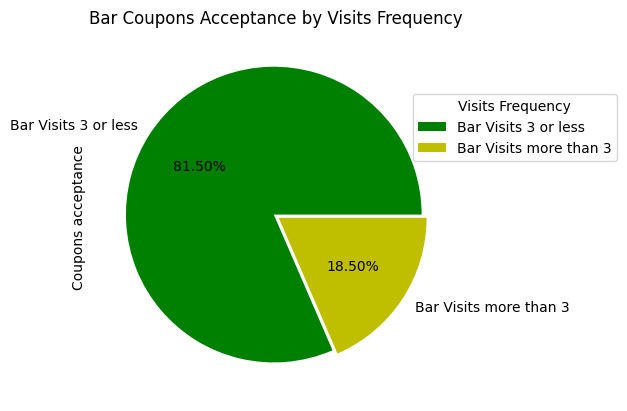

In [48]:
# Plot bar coupons acceptance by visits frequency
def plot_coupons_acceptance_by_bar_visits():
    bar_visits_3_or_less_series = accepted_bar_coupons_df.query('Bar in @bar_visits_3_or_less and coupon == "Bar"')['Bar'].value_counts()
    bar_visits_4_or_more_series = accepted_bar_coupons_df.query('Bar in @bar_visits_4_or_more and coupon == "Bar"')['Bar'].value_counts()
    bar_visits_df = pd.concat([bar_visits_3_or_less_series, bar_visits_4_or_more_series], axis=0, keys=['G1', 'G2']).reset_index()
    bar_visits_df.columns = ['Bar Visits Group', 'Bar Visits', 'count']
    bar_visits_df = np.round((bar_visits_df.groupby('Bar Visits Group')['count'].sum() / accepted_bar_coupons) * 100, 2)
    bar_visits_df
    plt.title("Bar Coupons (Accepted vs Rejected)")
    bar_visits_df.plot(kind='pie', labels=['Bar Visits 3 or less', 'Bar Visits more than 3'], explode = [0.02,0.02], autopct = '%1.2f%%', colors = ['g', 'y'])
    plt.legend(title="Visits Frequency", bbox_to_anchor=(0.85,0.85), loc="upper left")
    plt.ylabel('Coupons acceptance')
    plt.title('Bar Coupons Acceptance by Visits Frequency')

plot_coupons_acceptance_by_bar_visits()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [49]:
# Check unique values for column age
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [50]:
# Get acceptance count for visitor age more than 25 and visits more than once a month
age_list = ['21', 'below21']
bar_visits_count_list = ['1~3', 'gt8', '4~8']

def bar_visitor_acceptance_by_age():
    age25_plus_bar_visitors_count = accepted_bar_coupons_df.query('age not in @age_list and Bar in @bar_visits_count_list').groupby('Bar')['Bar'].value_counts().sum()
    # age25_plus_bar_visitors_count
    
    # Get acceptance count for other bar visitors
    other_bar_visitors_count = accepted_bar_coupons - age25_plus_bar_visitors_count
    # other_bar_visitors_count
    
    # Calculate acceptance rate for Age >= 25 and bar visits >= 1
    acceptance_rate_age_25plus = np.round((age25_plus_bar_visitors_count / accepted_bar_coupons) * 100, 2)
    print(f'Acceptance rate for Age >= 25 and bar visits >= 1: {acceptance_rate_age_25plus} %')
    
    # Calculate acceptance rate other bar visitors
    acceptance_rate_other_bar_visitors = np.round((other_bar_visitors_count / accepted_bar_coupons) * 100, 2)
    print(f'Acceptance rate for other bar visitors: {acceptance_rate_other_bar_visitors} %')
    
    # Acceptance rate comparision for 25+ visitors vs other bar visitors
    diff_to_other_visitos_age_25_plus = np.round(acceptance_rate_other_bar_visitors - acceptance_rate_age_25plus, 2)
    print(f'Difference in acceptance rate of other bar visitors to 25+ visitors: {diff_to_other_visitos_age_25_plus}')

bar_visitor_acceptance_by_age()

Acceptance rate for Age >= 25 and bar visits >= 1: 35.31 %
Acceptance rate for other bar visitors: 64.69 %
Difference in acceptance rate of other bar visitors to 25+ visitors: 29.38


<h><b>Summary: Yes, acceptance rate is higher (2.47 times) for 25+ age vistors compared to younger bar visitors with age < 25.<b></h>
    <ol>
      <li><b>Drivers with age 25+ years and visit bar more than once a month tend to accept Bar coupon at the rate of (R1): 35.31 %</b></li>
      <li><b>Drivers with age less than 25 tend to accept Bar coupon at the rate of (R2): 64.69 %</b></li>
      <li><b>Difference in acceptance rate of other bar visitors to 25+ visitors (R2 - R1): 64.69 - 35.31 = 29.38 %.</b></li>
    </ol>

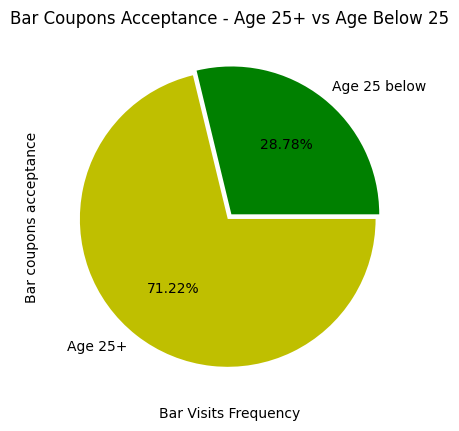

In [51]:
# Plot bar coupon acceptance distribution among Age 25+ and Age 25 below bar visitors 
def plot_age_wise_bar_coupon_acceptance():
    age_25plus = accepted_bar_coupons_df.query('age not in @age_list and Bar in @bar_visits_count_list').groupby('Bar')['Bar'].value_counts()
    age_25below = accepted_bar_coupons_df.query('age in @age_list and Bar in @bar_visits_count_list').groupby('Bar')['Bar'].value_counts()
    age_25_plus_below_df = pd.concat([age_25plus, age_25below], keys=['Age 25+', 'Age 25 Below']).reset_index()
    age_25_plus_below_df.columns = ['Age Group', 'Bar', 'count']
    age_25_plus_below_df = np.round((age_25_plus_below_df.groupby('Age Group')['count'].sum() / accepted_bar_coupons) * 100, 2)
    plt.title("Bar Coupons Acceptance - Age 25+ vs Age Below 25")
    age_25_plus_below_df
    age_25_plus_below_df.plot(kind='pie', labels=['Age 25 below', 'Age 25+'], explode = [0.02,0.02], autopct = '%1.2f%%', colors = ['g', 'y'])
    plt.xlabel("Bar Visits Frequency")
    plt.ylabel("Bar coupons acceptance")

plot_age_wise_bar_coupon_acceptance()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [52]:
# Check unique values for column passenger
bar_coupon_df['passenger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [53]:
# Check unique values for column occupation
bar_coupon_df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [54]:
# Get count of bar coupon acceptance for drivers who vists Bar multiple times, have no kids passenger and their occupation is not Farming
def bar_coupons_acceptance_comparision_nokids_no_fff_to_others():
    no_kids_no_farming_count = accepted_bar_coupons_df.query('passenger != "Kid(s)" and Bar in @bar_visits_count_list and occupation != "Farming Fishing & Forestry"').groupby('Bar')['Bar'].value_counts().sum()
    print(f'Acceptance count for drivers with no kids and not widowed: {no_kids_no_farming_count}')
    
    # Acceptance rate for no kids and no farming multplie Bar visitirs
    no_kids_no_farming_accept_rate = np.round((no_kids_no_farming_count / accepted_bar_coupons) * 100, 2)
    print(f'Acceptance rate for drivers with no kids and not widowed: {no_kids_no_farming_accept_rate} %')
    
    # Get count for other Bar visitors
    others_of_no_kids_no_farming_count = accepted_bar_coupons - no_kids_no_farming_count
    print(f'Acceptance count for other drivers: {others_of_no_kids_no_farming_count}')
    
    others_of_no_kids_no_farming_accept_rate = np.round((others_of_no_kids_no_farming_count / accepted_bar_coupons) * 100, 2)
    print(f'Acceptance rate for other drivers: {others_of_no_kids_no_farming_accept_rate} %')
    
    proportion_others_to_no_kids_no_farming = np.round((others_of_no_kids_no_farming_accept_rate / no_kids_no_farming_accept_rate), 2)
    print(f'Acceptance proportion for above two groups: {proportion_others_to_no_kids_no_farming} %')

bar_coupons_acceptance_comparision_nokids_no_fff_to_others()

Acceptance count for drivers with no kids and not widowed: 393
Acceptance rate for drivers with no kids and not widowed: 47.52 %
Acceptance count for other drivers: 434
Acceptance rate for other drivers: 52.48 %
Acceptance proportion for above two groups: 1.1 %


<h><b>Summary: Acceptance rate for other drivers was ~10% higher than the drivers with no passenger kids and no farming occupation.<b></h>
    <ol>
      <li><b>Acceptance rate for drivers bar visits > 1 and passengers were not kids and occupation was not farming(D1): 47.52 %</b></li>
      <li><b>Acceptance rate for other drivers (D2): 52.48 %</b></li>
      <li><b>Acceptance rate proportion between drivers (D2/D1):  52.48 / 47.52 = 1.1 times</b></li>
    </ol>

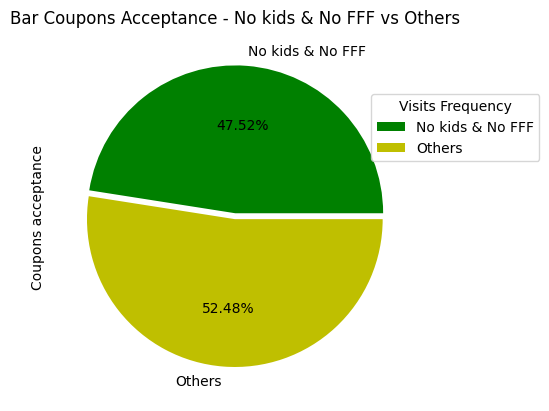

In [55]:
# Plot visuslization for comparision between drivers with no kids and no FFF occupation vs other drivers
def plot_bar_coupons_acceptance_comparision_nokids_no_fff_to_others():
    no_kids_no_farming_subset = accepted_bar_coupons_df.query('passenger != "Kid(s)" and Bar in @bar_visits_count_list and occupation != "Farming Fishing & Forestry"')
    no_kids_no_farming_count = no_kids_no_farming_subset.groupby('Bar')['Bar'].value_counts()
    complement_no_kids_no_farming_subset_index = accepted_bar_coupons_df.index.difference(no_kids_no_farming_subset.index)
    complement_no_kids_no_farming_subset = accepted_bar_coupons_df.loc[complement_no_kids_no_farming_subset_index]
    complement_no_kids_no_farming_count = complement_no_kids_no_farming_subset.groupby('Bar')['Bar'].value_counts()
    bar_accept_no_kids_no_farming_df = pd.concat([no_kids_no_farming_count, complement_no_kids_no_farming_count], axis=0, keys=['G1', 'G2']).reset_index()
    bar_accept_no_kids_no_farming_df.columns = ['Bar Visits Group', 'Bar Visits', 'count']
    bar_accept_no_kids_no_farming_df = np.round((bar_accept_no_kids_no_farming_df.groupby('Bar Visits Group')['count'].sum() / accepted_bar_coupons) * 100, 2)
    plt.title("Bar Coupons Acceptance - No kids & No FFF vs Others")
    bar_accept_no_kids_no_farming_df.plot(kind='pie', labels=['No kids & No FFF', 'Others'], explode = [0.02,0.02], autopct = '%1.2f%%', colors = ['g', 'y'])
    plt.legend(title="Visits Frequency", bbox_to_anchor=(0.85,0.85), loc="upper left")
    plt.ylabel('Coupons acceptance')

plot_bar_coupons_acceptance_comparision_nokids_no_fff_to_others()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [56]:
# Check unique values of maritalStatus column
bar_coupon_df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

6.1: go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [57]:
# Check unique values for "income" column
bar_coupon_df['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [58]:
# get bar coupon acceptance rate for drivers with no kids and not widowed to others
def bar_coupon_acceptance_rate_no_kids_not_wodowed():
    # Count of bar vistors who visted more than once in a month, had no kids passannder and were not widowed
    bar_multi_visitors_no_kids_no_widow = accepted_bar_coupons_df.query('passenger != "Kid(s)" and Bar in @bar_visits_count_list and maritalStatus != "Widowed"').groupby('Bar')['Bar'].value_counts().sum()
    bar_multi_visitors_no_kids_no_widow
    
    # Acceptance rate of bar vistors who (visted more than once in a month, had no kids passannder and were not widowed) 
    # compared to total bar coupons accepted
    multi_bar_visits_no_kids_no_widow_rate = np.round((bar_multi_visitors_no_kids_no_widow / accepted_bar_coupons) * 100, 2)
    multi_bar_visits_no_kids_no_widow_rate
    
    print(f'Acceptance proportion for no kids and no widowed to other drivers: {multi_bar_visits_no_kids_no_widow_rate} %')

bar_coupon_acceptance_rate_no_kids_not_wodowed()

Acceptance proportion for no kids and no widowed to other drivers: 47.52 %


<h><b>Summary-6.1: Acceptance rate for drivers with bar visits > 1, no kids passengers and not widowed (D1): 47.52 %<b></h>

6.2: go to bars more than once a month and are under the age of 30

In [59]:
# Count of multiple times bar vistors who are age < 30
age_inclusion_list = ['21', '26', 'below21']

def bar_coupons_acceptance_under30():
    bar_multi_visitors_under30 = accepted_bar_coupons_df.query('Bar in @bar_visits_count_list and age in @age_inclusion_list').groupby('Bar')['Bar'].value_counts().sum()
    bar_multi_visitors_under30
    
    # Acceptance rate of multiple times bar vistors who are age < 30
    bar_multi_visitors_under30_rate = np.round((bar_multi_visitors_under30 / accepted_bar_coupons) * 100, 2)
    bar_multi_visitors_under30_rate
    
    print(f'Acceptance proportion for age 30 and below vs other age groups: {bar_multi_visitors_under30_rate} %')

bar_coupons_acceptance_under30()

Acceptance proportion for age 30 and below vs other age groups: 30.11 %


<h><b>Summary-6.2: Acceptance rate for drivers with bar visits > 1 and age below 30 (D2): 30.11 %<b></h>

6.3: go to cheap restaurants more than 4 times a month and income is less than 50K

In [60]:
# Checj unique values for RestaurantLessThan20 column
bar_coupon_df['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [61]:
# set restuarent and income exclusion lists
restaurant_visits_inclusion_list = ['4~8', 'gt8']
income_inclusion_list = ['Less than $12500', '$12500 - $24999', '$25000 - $37499','$37500 - $49999']

def find_acceptance_rate_restaurant_visitors_under50k_income():    
    # Count of multiple times cheap restaurents vistors with income < 50k
    rest_multi_visitors_under50k_income = accepted_bar_coupons_df.query('RestaurantLessThan20 in @restaurant_visits_inclusion_list and income in @income_inclusion_list').groupby('Bar')['Bar'].value_counts().sum()
    rest_multi_visitors_under50k_income
    
    # Acceptance rate of multiple times cheap restaurents vistors with income < 50k
    rest_multi_visitors_under50k_income_rate = np.round((rest_multi_visitors_under50k_income / accepted_bar_coupons) * 100, 2)
    rest_multi_visitors_under50k_income_rate
    
    print(f'Acceptance proportion for drivers with income under 50k vs other income groups: {rest_multi_visitors_under50k_income_rate} %')

find_acceptance_rate_restaurant_visitors_under50k_income()

Acceptance proportion for drivers with income under 50k vs other income groups: 18.86 %


<h><b>Summary-6.3: Acceptance rate for drivers with restaurent visits > 4 and income below 50k (D3): 18.86 %<b></h>

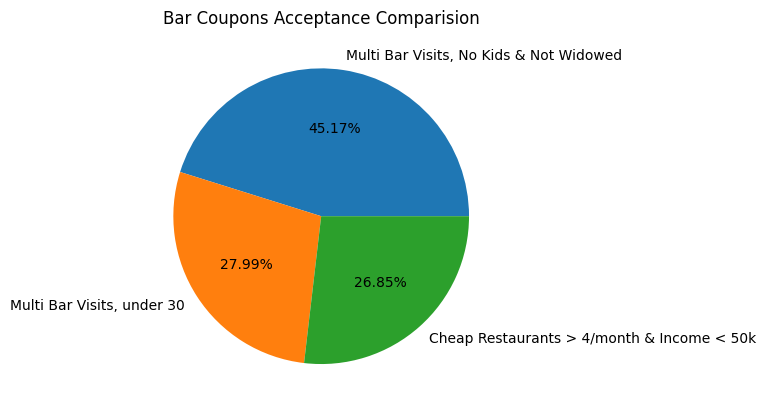

In [62]:
# Plot pie chart for drivers:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# go to bars more than once a month and are under the age of 30 OR
# go to cheap restaurants more than 4 times a month and income is less than 50K.

def plot_bar_coupon_acceptance_for_bar_visitors_and_rest_visitors():
    bar_visits_count_list = ['1~3', 'gt8', '4~8']
    restaurant_visits_inclusion_list = ['4~8', 'gt8']
    income_inclusion_list = ['Less than $12500', '$12500 - $24999', '$25000 - $37499','$37500 - $49999']
    
    all_coupon_types_accepted = data[data['Y'] == 1]
    bar_multi_visitors_no_kids_no_widow = all_coupon_types_accepted.query('passenger != "Kid(s)" and Bar in @bar_visits_count_list and maritalStatus != "Widowed"')
    bar_multi_visitors_under30 = all_coupon_types_accepted.query('Bar in @bar_visits_count_list and age in @age_inclusion_list')
    rest_multi_visitors_under50k_income = all_coupon_types_accepted.query('RestaurantLessThan20 in @restaurant_visits_inclusion_list and income in @income_inclusion_list')
    
    plt.title("Bar Coupons Acceptance Comparision")
    plt.pie([bar_multi_visitors_no_kids_no_widow.shape[0], bar_multi_visitors_under30.shape[0], rest_multi_visitors_under50k_income.shape[0]], autopct='%1.2f%%',
            labels=['Multi Bar Visits, No Kids & Not Widowed', 'Multi Bar Visits, under 30','Cheap Restaurants > 4/month & Income < 50k'])

plot_bar_coupon_acceptance_for_bar_visitors_and_rest_visitors()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<h><b>Hypothesize Summary - Bar Coupons Acceptance<b></h>
    <ol>
      <li><b>Overall bar coupons acceptance rate is: 41 %</b></li>
      <li><b>Drivers with bar visits 3 or less tend to accept coupon 4.40 times more than the visitos who visit the bar more than 3 times a month.</b></li>
      <li><b>Drivers older than age of 25 tend to accept bar 2.47 times more coupon than younger bar visitors.</b></li>
      <li><b>Acceptance rate for drivers with no passenger kids and no FFF occupation tend to accept 10% lesser coupons compared to other drivers.</b></li>
      <li><b>D1: Drivers who were not widowed, have no kids passengers and often visit bar tends to accept coupon at the rate of 47.52 %.</b></li>
      <li><b>D2: Drivers at age below 30 and who visit bar multiple times in a month tend to accept the coupon at the rate of 30.11 %.</b></li>
      <li><b>D3: Drivers with income below 50k and who visit restaurent more than 4 times a month, tend to accept the coupon at the rate of 18.86 %.</b></li>
    </ol>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [63]:
# Check unique values of CoffeeHouse column
data['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8'], dtype=object)

In [64]:
# get Coffee House coupon type dataframe
total_coffee_house_coupons_df = data.query('coupon == "Coffee House"')
total_coffee_house_coupons_df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [65]:
# accepted coffee house coupon dataframe
accept_coffee_coupon_df = data.query('Y == 1 and coupon == "Coffee House"')
accept_coffee_coupon_df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,1
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,1,0,1
12601,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1
12608,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1
12624,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,1


In [66]:
# inspect dataset columns
accept_coffee_coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 12 to 12631
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1995 non-null   object
 1   passenger             1995 non-null   object
 2   weather               1995 non-null   object
 3   temperature           1995 non-null   int64 
 4   time                  1995 non-null   object
 5   coupon                1995 non-null   object
 6   expiration            1995 non-null   object
 7   gender                1995 non-null   object
 8   age                   1995 non-null   object
 9   maritalStatus         1995 non-null   object
 10  has_children          1995 non-null   int64 
 11  education             1995 non-null   object
 12  occupation            1995 non-null   object
 13  income                1995 non-null   object
 14  Bar                   1995 non-null   object
 15  CoffeeHouse           1995 non-null   obj

In [67]:
# Get unique values for marital status 
accept_coffee_coupon_df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [68]:
# find unique values for weather
accept_coffee_coupon_df['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [69]:
# find unique values for temperature column
accept_coffee_coupon_df['temperature'].unique()

array([55, 80, 30])

1. What proportion of coffehouse coupons were accepted?

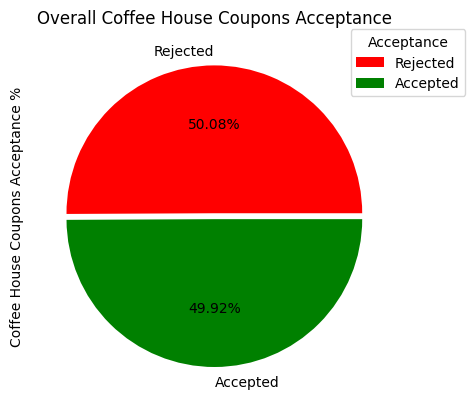

In [70]:
# plot overall coffee house coupons acceptance
def plot_overall_coffee_house_coupons_acceptance():
    # find total number of Coffee House coupons
    total_coffee_house_coupons = total_coffee_house_coupons_df.shape[0]
    total_coffee_house_coupons
    
    # find total number of accepted Coffee House coupons
    accepted_coffee_house_coupons = accept_coffee_coupon_df.shape[0]
    accepted_coffee_house_coupons
    
    # Accepted Coffee House coupons proportion compared to total Coffee House coupons
    accpted_coffee_house_coupons_proportion = np.round((accepted_coffee_house_coupons / total_coffee_house_coupons) * 100, 2)
    
    plt.title("Coffee House Coupons (Accepted vs Rejected)")
    total_coffee_house_coupons_df['Y'].value_counts().plot(kind='pie', labels=['Rejected', 'Accepted'], explode = [0.02,0.02], autopct = '%1.2f%%', colors = ['r', 'g'])
    plt.legend(title="Acceptance", bbox_to_anchor=(0.85,1.025), loc="upper left")
    plt.ylabel('Coffee House Coupons Acceptance %')
    plt.title('Overall Coffee House Coupons Acceptance')
    plt.savefig("images/ch_overall_acceptance.png")

plot_overall_coffee_house_coupons_acceptance()

2. Compare the acceptance rates between those drivers who:

- go to coffee house more than once a month, had passengers that were a kid, and were married.
- go to coffee house and bar more than once a month and are under the age of 30.
- go to coffee house when weather is sunny and temperature is 80.

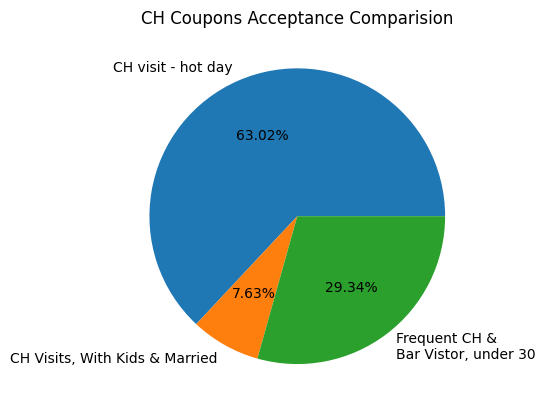

In [71]:
# prepare inclusion and exlusion list to apply filter on dataframe
bar_visits_count_list = ['1~3', 'gt8', '4~8']
coffee_house_visits_count_list = ['4~8', '1~3', 'gt8']
age_inclusion_list = ['21', '26', 'below21']
temp_inclusion_list = [80]

# plot overall coffee house coupons acceptance between below 3 groups:
# go to coffee house more than once a month, had passengers that were a kid, and were married.
# go to coffee house and bar more than once a month and are under the age of 30.
# go to coffee house when weather is sunny and temperature is 80.

def plot_overall_coffee_house_coupons_acceptance_comparision():
    all_coupon_types_accepted = data[data['Y'] == 1]
    
    coffee_house_multi_visitors_kids_and_married = all_coupon_types_accepted.query('passenger == "Kid(s)" and CoffeeHouse in @coffee_house_visits_count_list and maritalStatus == "Married partner"')
    coffee_house_multi_visitors_under30 = all_coupon_types_accepted.query('Bar in @bar_visits_count_list and CoffeeHouse in @coffee_house_visits_count_list and age in @age_inclusion_list')
    coffee_house_visit_hot_day = all_coupon_types_accepted.query('CoffeeHouse in @coffee_house_visits_count_list and weather == "Sunny" and temperature in @temp_inclusion_list')
    plt.title("CH Coupons Acceptance Comparision")
    plt.pie([coffee_house_visit_hot_day.shape[0], coffee_house_multi_visitors_kids_and_married.shape[0], coffee_house_multi_visitors_under30.shape[0]], autopct='%1.2f%%',
            labels=['CH visit - hot day', 'CH Visits, With Kids & Married', 'Frequent CH & \nBar Vistor, under 30'])
    plt.savefig("images/ch_drivers_comparision.png")

plot_overall_coffee_house_coupons_acceptance_comparision()

3. Compare the coffee house coupons acceptance rates for drivers who visit coffee house 3 or less times for various weather conditions

In [72]:
# set coffee house visit frquency inclusion list
coffee_house_visits_3_or_less = ['1~3', 'never', 'less1']

# plot visulaization for coffee house acceptance by weather for 3 or less times visitor
def plot_coffee_house_acceptance_by_weather( plt):
    all_coupon_types_accepted = data[data['Y'] == 1]
    
    coffee_house_visits_df = all_coupon_types_accepted.query('CoffeeHouse in @coffee_house_visits_3_or_less')
    coffee_house_visits_df = coffee_house_visits_df.groupby('weather')['weather'].value_counts()

    labels = ['CH Visits - Rainy Weather', 'CH Visits - Snowy Weather', 'CH Visits - Sunny']
    values = [coffee_house_visits_df['Rainy'], coffee_house_visits_df['Snowy'], coffee_house_visits_df['Sunny']]
    
    plt.title("CH Coupons Acceptance Comparision by Weather")
    plt.pie(values, autopct='%1.2f%%', labels=labels)

3. Compare the acceptance rates between male/female drivers who go to coffee house more than 3 times

In [73]:
# Set coffee house visits frequency list
coffee_house_visits_count_list = ['4~8', '1~3', 'gt8']

# plot visulaization for coffee house acceptance by gender for 3 or more times visitor
def plot_coffee_house_acceptance_by_gender(plt):
    all_coupon_types_accepted = data[data['Y'] == 1]
    coffee_house_visits_gender_df = all_coupon_types_accepted.query('CoffeeHouse in @coffee_house_visits_count_list')
    coffee_house_visits_gender_df = coffee_house_visits_gender_df.groupby('gender')['gender'].value_counts()
    coffee_house_visits_gender_df
    
    colors = sns.color_palette('pastel')
    values = [coffee_house_visits_gender_df['Male'], coffee_house_visits_gender_df['Female']]
    labels = ['CH Visits - Male', 'CH Visits - Female']
    plt.title("CH Coupons Acceptance Comparision by Gender")
    plt.pie(values, autopct='%1.2f%%', labels=labels, colors=colors)

4. Coffee house acceptance by Age

In [74]:
# Bar plot visulaization for coffee house acceptance by age
def plot_coffee_house_acceptance_by_age(plt):
    coffee_house_age = data.groupby('age')['age'].value_counts().reset_index()
    coffee_house_age
    sns.barplot(coffee_house_age, x='age', y='count', hue='age')
    plt.title('CH Coupons Distribution by Age')
    plt.xlabel('Age')
    plt.ylabel('CH Coupon Counts')
    plt.xticks(rotation=45)

5. Coffee house acceptance by Education

In [75]:
# Bar plot visulaization for coffee house acceptance by education
def plot_coffee_house_acceptance_by_education(plt):
    coffee_house_education = data.groupby('education')['education'].value_counts().reset_index()
    coffee_house_education
    sns.barplot(coffee_house_education, x='education', y='count', hue='education')
    plt.title('CH Coupons Distribution by Education')
    plt.xlabel('Education')
    plt.ylabel('CH Coupon Counts')
    plt.xticks(rotation=45)

6. Coffee house acceptance by Marital Status

In [76]:
# Bar plot visulaization for coffee house acceptance by marital status
def plot_coffee_house_acceptance_by_marital_status(plt):
    coffee_house_education = data.groupby('maritalStatus')['maritalStatus'].value_counts().reset_index()
    coffee_house_education
    sns.barplot(coffee_house_education, x='maritalStatus', y='count', hue='maritalStatus')
    plt.title('CH Coupons Distribution by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('CH Coupon Counts')
    plt.xticks(rotation=45)

7. Coffee house acceptance by Income

In [77]:
# Bar plot visulaization for coffee house acceptance by income
def plot_coffee_house_acceptance_by_income(plt):
    coffee_house_income = data.groupby('income')['income'].value_counts().reset_index()
    coffee_house_income
    sns.barplot(coffee_house_income, x='income', y='count', hue='income')
    plt.title('CH Coupons Distribution by Income')
    plt.xlabel('Income')
    plt.ylabel('CH Coupon Counts')
    plt.xticks(rotation=45)

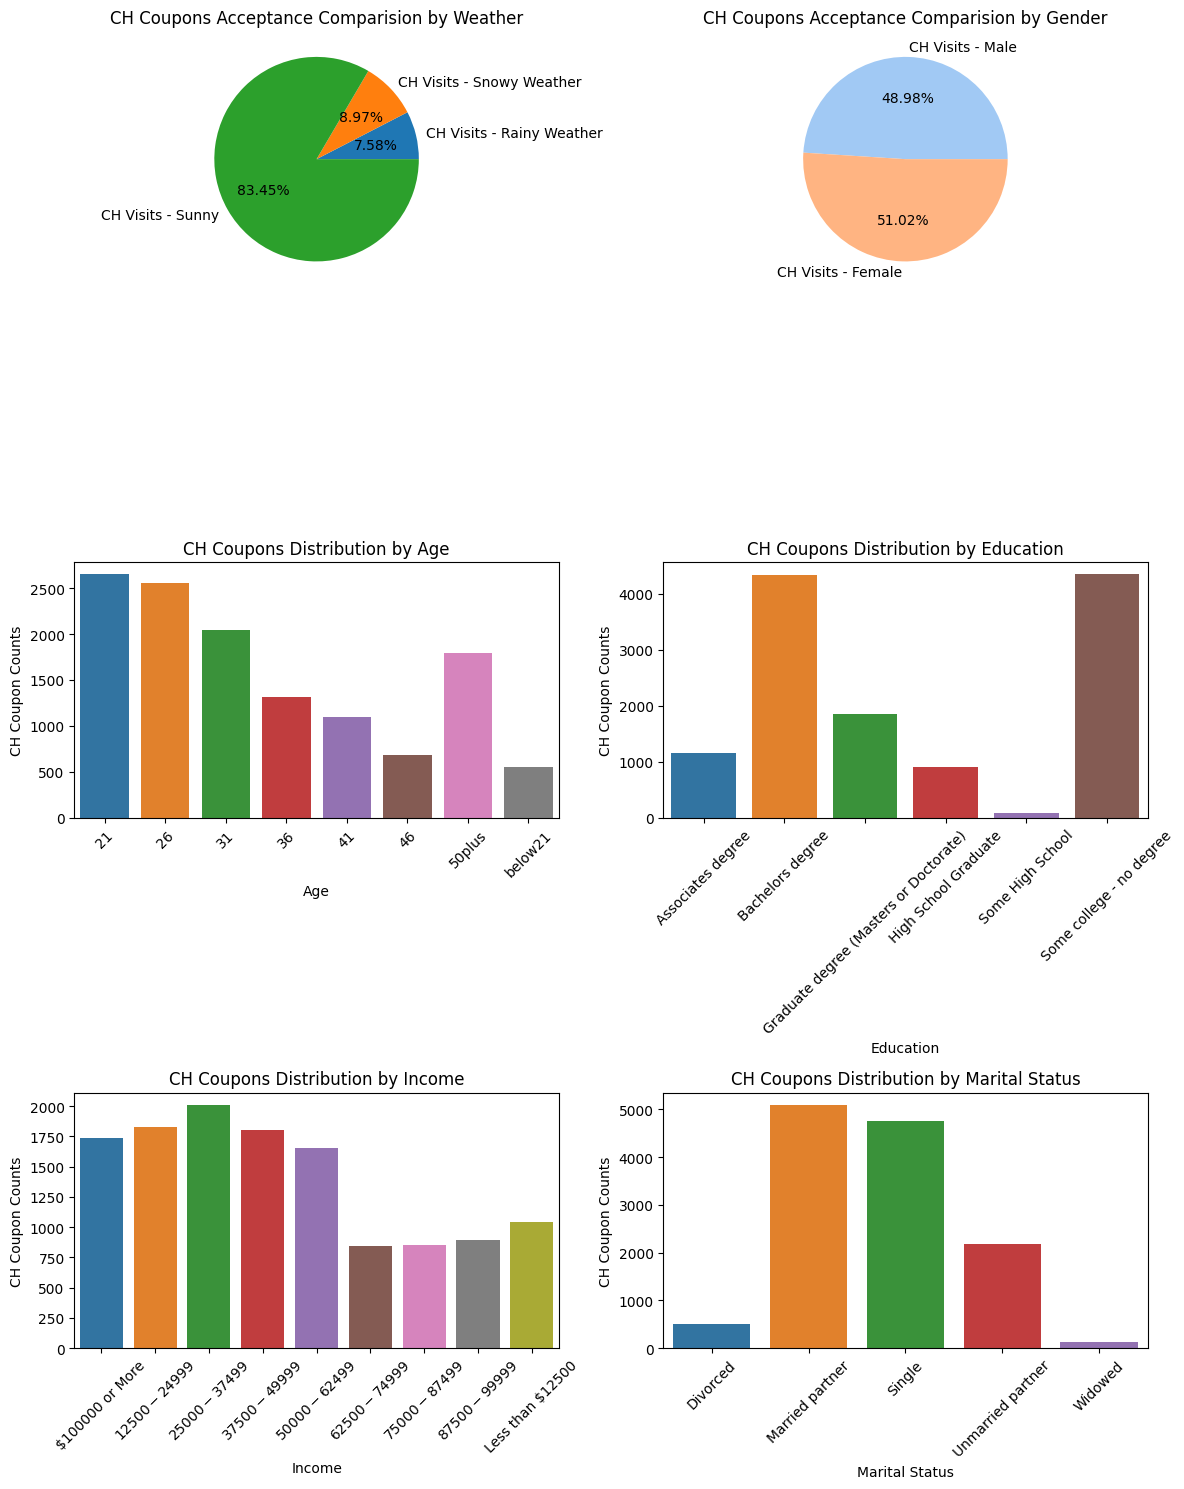

In [78]:
# Coffee house coupon acceptance subplots
plt.figure(figsize = (12,15))

plt.subplot(321)
plot_coffee_house_acceptance_by_weather(plt)

plt.subplot(322)
plot_coffee_house_acceptance_by_gender(plt)

plt.subplot(323)
plot_coffee_house_acceptance_by_age(plt)

plt.subplot(324)
plot_coffee_house_acceptance_by_education(plt)

plt.subplot(325)
plot_coffee_house_acceptance_by_income(plt)

plt.subplot(326)
plot_coffee_house_acceptance_by_marital_status(plt)

plt.tight_layout()
plt.savefig("images/coffee_house_subplots.png")
plt.show()